<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Названия-столбцов" data-toc-modified-id="Названия-столбцов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Названия столбцов</a></span></li><li><span><a href="#Пропуски" data-toc-modified-id="Пропуски-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Пропуски</a></span></li><li><span><a href="#Типы-значений" data-toc-modified-id="Типы-значений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Типы значений</a></span></li><li><span><a href="#Проверка-данных" data-toc-modified-id="Проверка-данных-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Проверка данных</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат,-высота-потолков" data-toc-modified-id="Площадь,-цена,-число-комнат,-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь, цена, число комнат, высота потолков</a></span></li><li><span><a href="#Время-продажи-квартир" data-toc-modified-id="Время-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартир</a></span></li><li><span><a href="#Что-влияет-на-стоимость-квартиры" data-toc-modified-id="Что-влияет-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Что влияет на стоимость квартиры</a></span></li><li><span><a href="#Топ-10-населенных-пунктов" data-toc-modified-id="Топ-10-населенных-пунктов-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Топ-10 населенных пунктов</a></span></li><li><span><a href="#Определяем-центр-Санкт-Петербурга" data-toc-modified-id="Определяем-центр-Санкт-Петербурга-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Определяем центр Санкт-Петербурга</a></span></li><li><span><a href="#Оценка-сегмента-квартир-в-центре-Санкт-Петербурга" data-toc-modified-id="Оценка-сегмента-квартир-в-центре-Санкт-Петербурга-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Оценка сегмента квартир в центре Санкт-Петербурга</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

Сначала откроем исходный файл, ознакомимся с данными в таблице.

In [537]:
import pandas as pd             # импорт библиотеки pandas
import numpy as np              # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт модуля pyplot библиотеки matplotlib
pd.set_option('display.float_format', '{:,.2f}'.format)

In [538]:
df=pd.read_csv('/datasets/real_estate_data.csv', '\t') # открываем исходный файл и сохраняем его в переменную df
pd.set_option('display.max_columns', None)             # вывод всех столбцов таблицы
pd.set_option('display.max_rows', None)                # вывод всех строк
df.head(10)                                            # выводим первые 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,"13,000,000.00",108.00,2019-03-07T00:00:00,3,2.70,16.00,51.00,8,NaN,False,False,25.00,nan,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan
1,7,"3,350,000.00",40.40,2018-12-04T00:00:00,1,nan,11.00,18.60,1,NaN,False,False,11.00,2.00,посёлок Шушары,"12,817.00","18,603.00",0.00,nan,0.00,nan,81.00
2,10,"5,196,000.00",56.00,2015-08-20T00:00:00,2,nan,5.00,34.30,4,NaN,False,False,8.30,0.00,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00
3,0,"64,900,000.00",159.00,2015-07-24T00:00:00,3,nan,14.00,nan,9,NaN,False,False,nan,0.00,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00
4,2,"10,000,000.00",100.00,2018-06-19T00:00:00,2,3.03,14.00,32.00,13,NaN,False,False,41.00,nan,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00
5,10,"2,890,000.00",30.40,2018-09-10T00:00:00,1,nan,12.00,14.40,5,NaN,False,False,9.10,nan,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00
6,6,"3,700,000.00",37.30,2017-11-02T00:00:00,1,nan,26.00,10.60,6,NaN,False,False,14.40,1.00,посёлок Парголово,"52,996.00","19,143.00",0.00,nan,0.00,nan,155.00
7,5,"7,915,000.00",71.60,2019-04-18T00:00:00,2,nan,24.00,nan,22,NaN,False,False,18.90,2.00,Санкт-Петербург,"23,982.00","11,634.00",0.00,nan,0.00,nan,nan
8,20,"2,900,000.00",33.16,2018-05-23T00:00:00,1,nan,27.00,15.43,26,NaN,False,False,8.81,nan,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00
9,18,"5,400,000.00",61.00,2017-02-26T00:00:00,3,2.50,9.00,43.60,7,NaN,False,False,6.50,2.00,Санкт-Петербург,"50,898.00","15,008.00",0.00,nan,0.00,nan,289.00


Исходная таблица содержит в себе сведения об объектах недвижимости. В ней есть следующие данные:
- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
-`balcony` — число балконов
-`ceiling_height` — высота потолков (м)
-`cityCenters_nearest` — расстояние до центра города (м)
-`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
-`first_day_exposition` — дата публикации
-`floor` — этаж
-`floors_total` — всего этажей в доме
-`is_apartment` — апартаменты (булев тип)
-`kitchen_area` — площадь кухни в квадратных метрах (м²)
-`last_price` — цена на момент снятия с публикации
-`living_area` — жилая площадь в квадратных метрах (м²)
-`locality_name` — название населённого пункта
-`open_plan` — свободная планировка (булев тип)
-`parks_around3000` — число парков в радиусе 3 км
-`parks_nearest` — расстояние до ближайшего парка (м)
-`ponds_around3000` — число водоёмов в радиусе 3 км
-`ponds_nearest` — расстояние до ближайшего водоёма (м)
-`rooms` — число комнат
-`studio` — квартира-студия (булев тип)
-`total_area` — площадь квартиры в квадратных метрах (м²)
-`total_images` — число фотографий квартиры в объявлении

Проверим типы данных в столбцах, а также количество пропупщуенных значений.

In [539]:
df.info() # данные о таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

По исходным данным можно отметить следующие моменты:

Названия:
 - названия столбцов `cityCenters_nearest`,`parks_around3000` и `ponds_around3000` приведем к змеиному виду.
 
Типы данных:
 - данные столбца `first_day_exposition` типа `object` (приведем к типу `datetime`);
 - число этажей `floors_total` и балконов`balcony` не целые числа;
 - количество парков `parks_around3000` и водоемов `ponds_around3000` так же не целые числа;
 - апартаменты `is_apartment` должны быть булев типа, а не `object` (скорее всего, это из-за пропусков).
 
Пропуски:
 - мало данных по в столбцах `is_apartment`,`parks_nearest`, `ponds_nearest`;
 - много пропусков в столбцах `ceiling_height`и `balcony`;
 - примерно одинаковое количество пропусков в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`;
 - есть пропуски в столбцах `floors_total`, `living_area`, `kitchen_area`, `locality_name`, `days_exposition`.

### Вывод

Необходимо внести коррективы в таблицу (названия, типы данных). Все числовые значения (кроме площадей и высоты) сделаем целыми числами для удобства работы.

По пропускам есть следующие предположения:
1. Данные по аппартаментам `is_apartment` не заполнены там, где они должны быть `False`.
2. Пропущенные значения числа балконов `balcony` там, где балконы отсутствуют.
3. Пропуски пропусков в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000` и `ponds_around3000` связаны и связаны с конкретными населенными пунктам `locality_name`.
4. Пропуски `parks_nearest` и `ponds_nearest` там, где нет прудов и водоемов (т.е. должны быть нули).
5. Пропуски жилой площади`living_area` и площади кухни  `kitchen_area` связаны и скорее всего останутся.

Пока не очень понятно, как быть с пропусками данных о высоте потолков `ceiling_height`. Их много и врядли они связаны с какими-то другими данными.

Также пропуски по дням размещения объявления `days_exposition` могут быть там, где объявление еще не снято с публикации. Тогда это ошибка хранения данных. Заменить их на что-то другое нет возможности. Для удаления их слишком много.

## Предобработка данных
### Названия столбцов

Заменим названия столбцов `cityCenters_nearest`,`parks_around3000` и `ponds_around3000`.

In [540]:
df = df.rename(columns=                                         # переименуем три столбца в "змеиный вид"
               {'cityCenters_nearest':'city_centers_nearest',   
                'parks_around3000':'parks_around_3000', 
                'ponds_around3000':'ponds_around_3000'})

### Пропуски

Сначала посмотрим на количество нулевых значений в таблице. Если мы будем заменять некоторые пропуски чисел на ноль (для удобство расчетов), то как это повлияет на данные.

In [541]:
df[df == 0].count() # считаем строки с нулевыми значениями

total_images             1059
last_price                  0
total_area                  0
first_day_exposition        0
rooms                     197
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment             2725
studio                  23550
open_plan               23632
kitchen_area                0
balcony                  3758
locality_name               0
airports_nearest            1
city_centers_nearest        0
parks_around_3000       10106
parks_nearest               0
ponds_around_3000        9071
ponds_nearest               0
days_exposition             0
dtype: int64

Теперь проверим наши предположения по пропускам некоторых данных.
В столбце `is_apartment`, в нем много пропусков. Скорее всего это ошибка ввода данных и значение отсутвуют там, где должно быть `False`.

In [542]:
df['is_apartment'].value_counts() # проверим значения в столбце is_apartment

False    2725
True       50
Name: is_apartment, dtype: int64

Доля аппартаменов, по которым заполнены значения, составляет менее 2%. Если заполнить все пропуски на `False`, доля аппартаментов будет ок. 0,2% - что неправдопадобно мало. Поэтому пропуски оставляем.

Теперь проверим значения в столбце с количеством балконов `balcony`. Вероятно, пропуски означают отсутствие балкона (ошибка ввода данных).

In [543]:
df['balcony'].value_counts() # проверим значения в столбце balcony

1.00    4195
0.00    3758
2.00    3659
5.00     304
4.00     183
3.00      81
Name: balcony, dtype: int64

Скорее всего, пропуски действительно означают отсутствие балконов. Здесь замену произведем на нули.

In [544]:
df['balcony'].fillna(0, inplace=True) # заменим не указанное количество балконов balcony нулями

Следующее предположение касается данных по `airports_nearest`, `city_сenters_nearest`, `parks_around_3000` и `ponds_around_3000`. Проверим, связаны ли они.

In [545]:
len(df[df['airports_nearest'].isna()       # ищем длину строк с пропусками одновременно в airports_nearest,
       & df['city_centers_nearest'].isna() # в city_centers_nearest
       & df['parks_around_3000'].isna()    # в parks_around_3000
       & df['ponds_around_3000'].isna()])  # в ponds_around_3000

5518

Действительно, пропуски `parks_around_3000` и `ponds_around_3000` в тех же строках, где есть пропуски по `airports_nearest`, `city_сenters_nearest`. Проверим, связаны ли они с конкретным населенным пунктом.

In [546]:
(df[df['airports_nearest'].isna()                      # пустые строки одновременно в airports_nearest
   & df['city_centers_nearest'].isna()                 # в city_centers_nearest
   & df['parks_around_3000'].isna()                    # в parks_around_3000
   & df['ponds_around_3000'].isna()]                   # в ponds_around_3000
   .groupby('locality_name')['locality_name'].count()) # группируем по locality_name и считаем их количество

locality_name
Бокситогорск                                                16
Волосово                                                    36
Волхов                                                     111
Всеволожск                                                 398
Выборг                                                     237
Высоцк                                                       4
Гатчина                                                    307
Ивангород                                                   28
Каменногорск                                                13
Кингисепп                                                  104
Кириши                                                     125
Кировск                                                     84
Колпино                                                      1
Коммунар                                                    89
Красное Село                                                 2
Кронштадт                                

Не связаны. Придется оставить пропуски в этих столбцах как есть. При этом строки с пропусками населенных пунктов удалим, т.к. их очень мало - всего 0,2%. Эти строки можно будет удалить, в дальнейшем анализе они не будут полезны.

In [547]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True) # удалим пропуски населенного пункта locality_name

Ранее мы проверяли таблицу на нулевые значения. В столбцах `parks_nearest` и `ponds_nearest` таких не оказалось. Возможно это как раз строки, где данные о парках `parks_around_3000` и водоемах `ponds_around_3000` либо отсутствуют, либо имеют значение ноль. Проверим.

In [548]:
# посчитаем строки, где нет данных по parks_nearest, но есть по parks_around_3000
display(len(df[df['parks_nearest'].isna() & df['parks_around_3000'] >= 1]))
# посчитаем строки, где нет данных по ponds_nearest, но есть по ponds_around_3000
len(df[df['ponds_nearest'].isna() & df['ponds_around_3000'] >= 1])

0

0

Таких строк не оказалось. А значит пропуски по `parks_nearest` и `ponds_nearest` заменить на нулевые значения, кроме тех строк, где вовсе отсутствуют данные о парках `parks_around_3000` и водоемах `ponds_around_3000`. Остальные пропуски придется оставить.

In [549]:
# заменяем пропуски parks_nearest на нули, где есть данные по parks_around_3000
df.loc[(df['parks_nearest'].isna()) & (~df['parks_around_3000'].isna()), 'parks_nearest'] = 0
# заменяем пропуски ponds_nearest на нули, где есть данные по ponds_around_3000
df.loc[(df['ponds_nearest'].isna()) & (~df['ponds_around_3000'].isna()), 'ponds_nearest'] = 0

Теперь проверим, связаны ли пропуски жилой площади `living_area` и площади кухни `kitchen_area` друг с другом.

In [550]:
len(df[df['living_area'].isna() & df['kitchen_area'].isna()])

1460

Пропуски оставлены в одинх и тех же строках таблицы. Скорее всего данные не были внесены пользователем. Заполним пропущенные значения жилой площади `living_area` и площади кухни `kitchen_area` исходя из среднего отношения этих площадей к общей площади `total_area` с учетом количества комнат `rooms`.

In [551]:
df['share_living_area'] = df['living_area'] / df['total_area']    # добавим столбец с долей жилой площади share_living_area
df['share_kitchen_area'] = df['kitchen_area'] / df['total_area']  # добавим столбец с долей площади кухни share_kitchen_area
df = df.round({'share_living_area':2, 'share_kitchen_area':2})    # округляем значения долей площади до сотых

# заполним пропуски living_area по среднему отношению share_living_area в зависимости от количества комнат rooms
k_living_area = round(df.groupby('rooms')['share_living_area'].transform('median')*df['total_area'], 2)
df['living_area'] = df['living_area'].fillna(k_living_area)
# заполним пропуски kitchen_area по среднему отношению share_living_area в зависимости от количества комнат rooms
k_kitchen_area = round(df.groupby('rooms')['share_kitchen_area'].transform('median')*df['total_area'],2)
df['kitchen_area'] = df['kitchen_area'].fillna(k_kitchen_area)

Теперь проанализируем значения в столбце `ceiling_height`.

In [552]:
df['ceiling_height'].value_counts() #выведем все значения высоты потолка ceiling_height

2.50      3515
2.60      1645
2.70      1572
3.00      1109
2.80       993
2.55       980
2.75       906
2.65       676
3.20       276
3.10       203
2.90       164
3.30       141
2.56       139
3.50       130
2.57       103
2.85       101
3.40        92
2.54        83
2.64        81
2.52        79
2.53        67
2.58        63
2.77        61
2.76        60
3.15        57
2.78        51
2.95        47
3.05        46
4.00        38
3.25        36
2.67        36
3.60        36
2.73        35
2.51        34
2.72        31
3.70        30
2.74        28
2.40        23
2.68        23
3.80        20
2.84        19
2.82        18
3.55        17
2.66        17
3.12        16
3.35        16
2.45        15
2.83        15
3.08        14
2.62        14
3.90        14
2.59        14
2.63        13
2.71        13
2.88        12
2.00        11
3.06        11
3.07        11
3.18        11
3.13        11
2.79        10
4.20        10
3.33        10
2.87        10
3.45         9
2.81         9
2.92      

В значениях высоты потолка `ceiling_height` есть следующие группы:
- меньше 2,4м (это явно ошибка данных)
- от 2,4м до 11м (нормальные значения, с учетом наличия "второго света")
- от 11м до 24м (скорее ошибка данных)
- от 20м (скорее всего, ошибка в разряде)

In [553]:
print('Высота потолка менее 2,4м -', len(df.query('ceiling_height < 2.4')), 'шт.')
print('Высота потолка от 2,4м до 11м -', len(df.query('(ceiling_height >= 2.4) & (ceiling_height < 11)')), 'шт.')
print('Высота потолка от 11м до 24м -', len(df.query('(ceiling_height >= 11) & (ceiling_height < 24)')), 'шт.')
print('Высота потолка более 24м -', len(df.query('ceiling_height >= 24')), 'шт.')

Высота потолка менее 2,4м - 21 шт.
Высота потолка от 2,4м до 11м - 14445 шт.
Высота потолка от 11м до 24м - 3 шт.
Высота потолка более 24м - 21 шт.


Удалим строки с высотой потолка менее 2,4м, а также от 11м до 24м. Это скорее всего ошибка ввода данных. Ошибку с порядком значений (от 24м) исправим.

In [554]:
# высоту потолка ceiling_height больше 20 м разделим на 10
df.loc[df['ceiling_height'] >= 24 , 'ceiling_height'] /= 10
# оставим только те строки, где высота от 2,4м до 11м и пропуски
df = df[df['ceiling_height'].isna() | ((df['ceiling_height'] >= 2.4) & (df['ceiling_height'] < 11))]

Остальные пропущенные значения высоты потолков `ceiling_height` заменим медианными по населенному пункту `locality_name`, кроме Санкт-Петербурга (слишком широкий разброс в одних и тех же частях города)

In [555]:
#заполним пропуски ceiling_height медианными значениями по населенному пункту locality_name, кроме Санкт-Петербурга
median_height = df.groupby('locality_name')['ceiling_height'].transform('median')
df.loc[df['locality_name'] != 'Санкт-Петербург','ceiling_height'] = df['ceiling_height'].fillna(median_height)

Теперь посмотрим на столбец с этажностью floors_total. Посмотрим, связано ли это с конкретным этажом.

In [556]:
df[df['floors_total'].isna()].groupby('floor')['floor'].count() # пропуски в столбце floors_total группируем по floor и считаем

floor
1     3
2     2
3     4
4     9
5     4
6     9
7     4
8     8
9     5
10    3
11    3
12    6
13    3
14    2
15    3
17    1
18    3
19    3
20    2
21    4
22    1
23    1
24    2
Name: floor, dtype: int64

Связи с конкретным этажом нет. Возможно, данные пропущены там, где номер этажа `floor` совпадает с этажностью объекта `floors_total`. В связи с тем, что пропущенных значений немного, лучше удалить такие строки для корректности анализа.

In [557]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True) # удаляем строки с пропущенными значениями

### Типы значений

Приведем значения даты публткации в столбце `first_day_exposition` к типу `datetime`.


In [558]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') # меняем тип данных на даты

Теперь заменим на целочисленные значения (для удобства вычислений) в следующих столбцах:
 - `last_price`;
 - `floors_total`;
 - `balcony`.
 
 К сожалению, из-за наличия пропусков в других числовых столбцах их тип останется вещественным.

In [559]:
# изменим тип данных last_price, floors_total и balcony на целочисленный
df = df.astype({'last_price':'int', 'floors_total':'int', 'balcony':'int'})
df.info() # проверим итоговые данные

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23541 entries, 0 to 23540
Data columns (total 24 columns):
total_images            23541 non-null int64
last_price              23541 non-null int64
total_area              23541 non-null float64
first_day_exposition    23541 non-null datetime64[ns]
rooms                   23541 non-null int64
ceiling_height          17866 non-null float64
floors_total            23541 non-null int64
living_area             23541 non-null float64
floor                   23541 non-null int64
is_apartment            2756 non-null object
studio                  23541 non-null bool
open_plan               23541 non-null bool
kitchen_area            23347 non-null float64
balcony                 23541 non-null int64
locality_name           23541 non-null object
airports_nearest        18032 non-null float64
city_centers_nearest    18055 non-null float64
parks_around_3000       18056 non-null float64
parks_nearest           18056 non-null float64
ponds_around

### Проверка данных
Для проведения исследовательского анализа нам необходимо дополнительно проверить данные на выбросы:
- общая площадь кватриры `total_area`;
- день публикации объявления `first_day_exposition`;
- количесвто комнат `rooms`;
- удаленность от центра `city_centers_nearest`

Стоимость `last_price` возможно будет оценить с точки зрения стоимости за 1 квадратный метр. Сделаем это в рамках исследовательского анализа.

Проверим общую площадь квартиры `total_area` на минимальные и максимальные значения.

In [560]:
display(df['total_area'].nsmallest(10)) # 10 максимальных значений total_area
df['total_area'].nlargest(10)           # 10 минимальных значений total_area

19776   12.00
17842   13.00
19418   13.00
19679   13.00
19430   13.20
19514   14.00
11963   15.00
16838   15.00
8835    15.50
9359    16.00
Name: total_area, dtype: float64

19412   900.00
12777   631.20
3099    631.00
15554   618.00
5325    590.00
4211    517.00
7969    507.00
5855    500.00
14920   500.00
12321   495.00
Name: total_area, dtype: float64

In [561]:
# выведем данные по квартире общей площадью 900 м²
df[df['total_area'] == 900]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,share_living_area,share_kitchen_area
19412,8,420000000,900.00,2017-12-06,12,2.80,25,409.70,25,NaN,False,False,112.00,0,Санкт-Петербург,"30,706.00","7,877.00",0.00,0.00,2.00,318.00,106.00,0.46,0.12


Минимальные площади похожи на студии, максимальные площади тоже имеют место быть. 

Уточним даты подачи объявлений.

In [562]:
display(df['first_day_exposition'].min())                           # минимальное значение first_day_exposition
display(df['first_day_exposition'].max())                           # максимальное значение first_day_exposition
df['first_day_exposition'].max() - df['first_day_exposition'].min() # суммарное количество дней

Timestamp('2014-11-27 00:00:00')

Timestamp('2019-05-03 00:00:00')

Timedelta('1618 days 00:00:00')

Данные собраны с ноября 2014 года по май 2019 года - всего 1618 дней (4 года 5 месяцев).

Проверим значения количества комнат `rooms`.

In [563]:
df['rooms'].value_counts() # выведем значения столбца rooms

1     7996
2     7888
3     5772
4     1172
5      325
0      194
6      104
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64

Комнат более 7 существенно меньше остальных. Проверим, не является ли это ошибкой. 

In [564]:
# выведем столбцы rooms, living_area, total_area для строк, где комнат больше 7
df.loc[df['rooms'] > 7,['rooms', 'living_area', 'total_area']]

,rooms,living_area,total_area
643,11,138.80,183.70
807,8,160.00,229.00
860,14,222.00,363.00
4126,10,145.90,272.60
4409,8,115.80,191.20
5325,15,409.00,590.00
7809,8,220.00,230.00
8707,8,107.00,150.00
8771,9,160.10,398.00
8809,9,148.05,235.00


При таких площадях большое количество комнат вполне допустимо.
Теперь проверим комнаты с нулевым значением.

In [565]:
# сгруппируем комнаты с нулевым значением по наличию свободной планировки и студии,
# посчитаем для всех ли этих комнат указаны жилая площадь и площадь кухни
df[(df['rooms'] == 0)].groupby(['open_plan','studio'])['rooms', 'living_area', 'kitchen_area'].count()

,,rooms,living_area,kitchen_area
open_plan,studio,,,
False,True,135,135,0
True,False,59,59,0


Строки, где количество комнат равно нулю делятся на две группы - студия или свободная планировка. Во всех строках также отсутстуют данные о площади кухни, что логично. Для анализа лучше однозначно разделять студии и неизвестное количество комнат. Поэтому заменим количесво комнат при свободной планировке на NaN.

In [566]:
# для квартир со свободной планировкой open_plan и нулевым значением комнат rooms удалим количество комнат rooms
df.loc[(df['rooms'] == 0) & df['open_plan'], 'rooms'] = np.nan 

Далее рассмотрим данные об удаленности объектов `city_centers_nearest`, проверив максимальные и минимальные значения по населенным пунктам `locality_name`.

In [567]:
# сводная таблица минимальных и максимальных значений city_centers_nearest по locality_name
df.pivot_table('city_centers_nearest', 'locality_name', aggfunc=['min', 'max'])

,min,max
,city_centers_nearest,city_centers_nearest
locality_name,,
Зеленогорск,"51,115.00","62,706.00"
Колпино,"29,436.00","37,477.00"
Красное Село,"27,317.00","41,792.00"
Кронштадт,"46,657.00","51,511.00"
Ломоносов,"36,816.00","61,495.00"
Павловск,"31,533.00","36,445.00"
Петергоф,"29,815.00","49,574.00"
Пушкин,"24,311.00","35,610.00"


Данные об удаленности объекта от центра города `city_centers_nearest` есть только для Санкт-Петербурга (с учетом его административных границ). Это объяснимо: ведь ЛО по настоящее время не имеет своего административного центра. Учтем это при дальнейшем анализе.

### Выводы

После предобработки данных остались **пропуски**:
- в `is_apartment` их 88%, но для данного исследования они не критичны;
- высоты потолков `ceiling_height` (25%), учтем это при анализе;
- данных об удаленности от центра `city_centers_nearest` для всех населенных пунктов, кроме тех, что в черте Санкт-Петербурга;
- автоматических картографических данных ок. 25% (`airports_nearest`, `parks_around_3000`, `parks_nearest` `ponds_around_3000`, `ponds_nearest`) - нужно отдельно разбираться разработчикам;
- количества дней публикации объявления `days_exposition`(13%) - тоже скорее вопрос к разработчикам базы данных;
- количества комнат `rooms` появились для различия студий и объектов со свободной планировкой, их 0,1%.

В таблице собраны данные с ноября 2014 года по май 2019 года - всего 1618 дней (4 года 5 месяцев).

## Расчёты и добавление результатов в таблицу

Для проведения исследовательского анализа в таблицу необходимо добавить дополнительные столбцы:
- цена квадратного метра `price_square_meter`;
- день недели `day`, месяц `month` и год `year` публикации объявления;
- этаж квартиры по категриям `floor_group` - первый, последний, другой;
- доля жилой площади к общей `share_living_area`;
- доля площади кухни к общей `share_kitchen_area`.

In [568]:
df['price_square_meter'] = df['last_price'] / df['total_area']    # добавим столбец цены за кв.метр price_square_meter
df['price_square_meter'] = df['price_square_meter'].astype('int') # сделаем значения столбца price_square_meter целочисленными

In [569]:
df['day'] = df['first_day_exposition'].dt.weekday                 # добавим столбец с днем недели подачи объявления day 
df['month'] = df['first_day_exposition'].dt.month                 # добавим столбец с месяцем подачи объявления month
df['year'] = df['first_day_exposition'].dt.year                   # добавим столбец с годом подачи объявления year

In [570]:
def floor_groupper(raw):                                          # создаем функцию записи категории этажа floor_groupper
    floor = raw['floor']                                          # этаж берем из столбца floor
    floors_total = raw['floors_total']                            # количество этажей берем из столбца floors_total
    if floor == 1:                                                # если этаж равен 1
        return 'первый'                                           # возвращаем первый
    elif floor == floors_total:                                   # если этаж равен количеству этажей
        return 'последний'                                        # возвращаем последний
    return 'другой'                                               # возвращаем другой

df['floor_group'] = df.apply(floor_groupper, axis=1)              # применяем функцию floor_groupper

In [571]:
df['share_living_area'] = df['living_area'] / df['total_area']    # добавим столбец с долей жилой площади share_living_area
df['share_kitchen_area'] = df['kitchen_area'] / df['total_area']  # добавим столбец с долей площади кухни share_kitchen_area
df = df.round({'share_living_area':2, 'share_kitchen_area':2})    # округляем значения долей площади до сотых

df.head(10)                                                       # выведем на экран первые 10 строк таблицы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,share_living_area,share_kitchen_area,price_square_meter,day,month,year,floor_group
0,20,13000000,108.00,2019-03-07,3.00,2.70,16,51.00,8,NaN,False,False,25.00,0,Санкт-Петербург,"18,863.00","16,028.00",1.00,482.00,2.00,755.00,nan,0.47,0.23,120370,3,3,2019,другой
1,7,3350000,40.40,2018-12-04,1.00,2.63,11,18.60,1,NaN,False,False,11.00,2,посёлок Шушары,"12,817.00","18,603.00",0.00,0.00,0.00,0.00,81.00,0.46,0.27,82920,1,12,2018,первый
2,10,5196000,56.00,2015-08-20,2.00,nan,5,34.30,4,NaN,False,False,8.30,0,Санкт-Петербург,"21,741.00","13,933.00",1.00,90.00,2.00,574.00,558.00,0.61,0.15,92785,3,8,2015,другой
3,0,64900000,159.00,2015-07-24,3.00,nan,14,100.17,9,NaN,False,False,20.67,0,Санкт-Петербург,"28,098.00","6,800.00",2.00,84.00,3.00,234.00,424.00,0.63,0.13,408176,4,7,2015,другой
4,2,10000000,100.00,2018-06-19,2.00,3.03,14,32.00,13,NaN,False,False,41.00,0,Санкт-Петербург,"31,856.00","8,098.00",2.00,112.00,1.00,48.00,121.00,0.32,0.41,100000,1,6,2018,другой
5,10,2890000,30.40,2018-09-10,1.00,2.60,12,14.40,5,NaN,False,False,9.10,0,городской посёлок Янино-1,nan,nan,nan,nan,nan,nan,55.00,0.47,0.30,95065,0,9,2018,другой
6,6,3700000,37.30,2017-11-02,1.00,2.64,26,10.60,6,NaN,False,False,14.40,1,посёлок Парголово,"52,996.00","19,143.00",0.00,0.00,0.00,0.00,155.00,0.28,0.39,99195,3,11,2017,другой
7,5,7915000,71.60,2019-04-18,2.00,nan,24,42.24,22,NaN,False,False,18.90,2,Санкт-Петербург,"23,982.00","11,634.00",0.00,0.00,0.00,0.00,nan,0.59,0.26,110544,3,4,2019,другой
8,20,2900000,33.16,2018-05-23,1.00,2.70,27,15.43,26,NaN,False,False,8.81,0,посёлок Мурино,nan,nan,nan,nan,nan,nan,189.00,0.47,0.27,87454,2,5,2018,другой
9,18,5400000,61.00,2017-02-26,3.00,2.50,9,43.60,7,NaN,False,False,6.50,2,Санкт-Петербург,"50,898.00","15,008.00",0.00,0.00,0.00,0.00,289.00,0.71,0.11,88524,6,2,2017,другой


**Выводы**

Все необходимые расчеты произведены, данные добавлены. Можно переходить к исследовательскому анализу.

## Исследовательский анализ данных
В ходе исследования мы подробно и всесторонне изучим данные, постораемся найти связи и тенденции.

### Площадь, цена, число комнат, высота потолков
Cначала посмотрим на описание параметров.

In [572]:
display(df['total_area'].describe())         # описание данных total_area
display(df['price_square_meter'].describe()) # описание данных price_square_meter
display(df['rooms'].describe())              # описание данных rooms
display(df['ceiling_height'].describe())     # описание данных ceiling_height

count   23,541.00
mean        60.33
std         35.67
min         12.00
25%         40.00
50%         52.00
75%         69.70
max        900.00
Name: total_area, dtype: float64

count      23,541.00
mean       99,438.51
std        50,395.57
min           111.00
25%        76,648.00
50%        95,000.00
75%       114,253.00
max     1,907,500.00
Name: price_square_meter, dtype: float64

count   23,482.00
mean         2.08
std          1.08
min          0.00
25%          1.00
50%          2.00
75%          3.00
max         19.00
Name: rooms, dtype: float64

count   17,866.00
mean         2.71
std          0.28
min          2.40
25%          2.54
50%          2.63
75%          2.75
max         10.30
Name: ceiling_height, dtype: float64

На основании описания данных, учтем размах данных, выбросы и построим гистограммы параметров квартиры:
- общей площади `total_area`;
- цены за 1 квадратный метр `price_square_meter`;
- количества комнат `rooms`;
- высоты потолков `ceiling_height`.

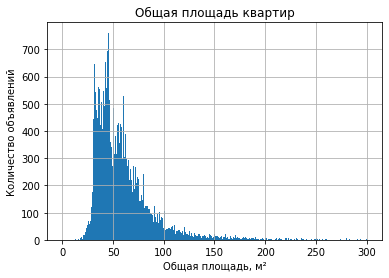

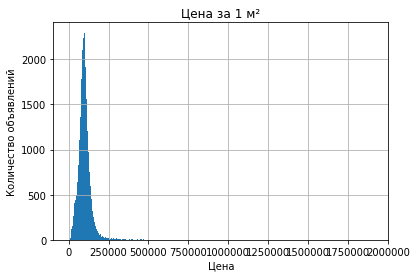

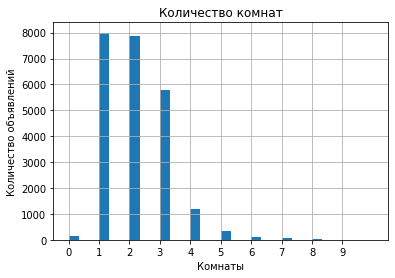

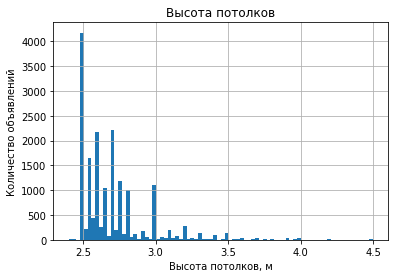

In [573]:
df.hist('total_area', bins=300, range=(0,300))            # гистограмма total_area
plt.title('Общая площадь квартир')
plt.xlabel('Общая площадь, м²')
plt.ylabel('Количество объявлений')
plt.show()      

df.hist('price_square_meter', bins=300) # гистограмма price_square_meter
plt.title('Цена за 1 м²')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
#plt.xticks(ticks=np.arange(0,500000, 25000))
plt.show()                                                
df.hist('rooms', bins=30, range=(0,10))                   # гистограмма rooms
plt.title('Количество комнат')
plt.xticks(ticks=np.arange(0, 10, 1))
plt.xlabel('Комнаты')
plt.ylabel('Количество объявлений')
plt.show()                                               
df.hist('ceiling_height', bins=80, range=(2.4,4.5))       # гистограмма ceiling_height
plt.title('Высота потолков')
plt.xlabel('Высота потолков, м')
plt.ylabel('Количество объявлений')
plt.show()                                                

Дополнительно исследуем данные по стоимости за квадратный метр `price_square_meter`. Найдем по 10 минимальных и максимальных значений `price_square_meter`, а также посмотрим на средние значения цены `price_square_meter` для разных населенных пунктов `locality_name`. 

In [574]:
display(df['price_square_meter'].nlargest(10))                           # 10 максимальных значений price_square_meter
display(df['price_square_meter'].nsmallest(10))                          # 10 минимальных значений price_square_meter
df.groupby('locality_name')['price_square_meter'].median().sort_values() # средние значения price_square_meter по locality_name

12887    1907500
1429     1736842
22679    1542604
14611    1000748
4966      995983
16360     857542
4830      848484
17061     848484
16540     841379
17794     813253
Name: price_square_meter, dtype: int64

8742       111
14815     7962
4379      9615
11277    10185
9527     10368
23322    10507
23329    10561
5664     10714
19332    10769
9417     10897
Name: price_square_meter, dtype: int64

locality_name
деревня Старополье                                         11,000.00
посёлок станции Свирь                                      11,481.00
деревня Вахнова Кара                                       11,688.00
деревня Выскатка                                           12,335.00
поселок Совхозный                                          12,628.50
деревня Малая Романовка                                    12,724.00
поселок Тёсово-4                                           12,931.00
деревня Сижно                                              13,709.00
деревня Ям-Тесово                                          13,711.00
поселок Житково                                            14,956.00
поселок станции Лужайка                                    15,000.00
поселок городского типа Ефимовский                         15,612.00
поселок Почап                                              16,037.00
деревня Чудской Бор                                        16,286.00
деревня Фалилеево   

По этим данным с уверенностью можно сказать, что явная ошибка со стоимостью квадратного метра только при значении 111. Остальные минимальные значения в рамках средних значений для ряда населенных пунктов. Что касается сверхдорогих объектов (от 500 000), сказать, что это ошибка однозначно нельзя. Однако, в рамках данного исследования, эти объекты являются выбросами. Поэтому исключим их из данных.

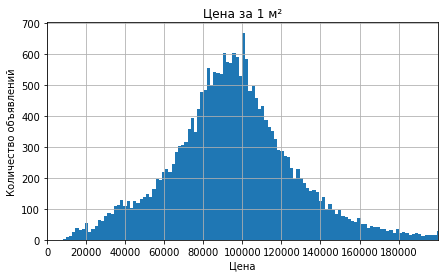

In [575]:
# оставим в таблице значения price_square_meter от 7000 до 500 000
df = df.query('(price_square_meter > 7000) & (price_square_meter <= 500000)').reset_index(drop=True)

df.hist('price_square_meter', bins=300, figsize=(7,4)) # гистограмма price_square_meter
plt.title('Цена за 1 м²')
plt.xlabel('Цена')
plt.ylabel('Количество объявлений')
plt.xlim(0,200000)
plt.xticks(ticks=np.arange(0,200000, 20000))
plt.show()                                        

**Выводы**
1. Общая площадь квартир от 25м² до 110м². Квартир площадью более 110м² существенно меньше. Больше всего в продаже картир общей площадью до 50м².
2. Средняя цена за квадратный метр варьируется в диапазоне от 90 000 до 105 000.
3. Самые распространенные квартиры 1,2-х комнатные, что соответствует площади квартир до 50м². Трехкомнатных квартир тоже много, но небольшой площади. Многокомнатных квартир в продаже существенно меньше, как и студий.
4. Самая распространенная высота потолков 2,4м. Достаточное количество квартир с потолками до 3х метров. Квартиры со вторым светом - единицы.

### Время продажи квартир
Оценим длительность продажи квартир. Для этого посмотрим на описание данных о длительности размещения объявлений days_exposition и построим гистрграмму.

count   20,343.00
mean       180.64
std        219.69
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64

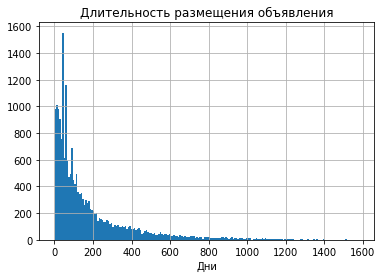

In [576]:
display(df['days_exposition'].describe())       # описание данных
df.hist('days_exposition', bins=200)            # гистограмма days_exposition
plt.title('Длительность размещения объявления')
plt.xlabel('Дни')
plt.show()                               

На гистрограмме видно, что длительность объявления в целом не привышает 18 месяцев. Увеличим масштаб графика до 8 месяцев.

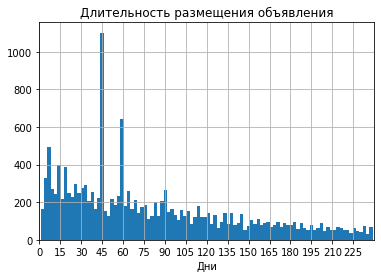

In [577]:
df.query('days_exposition < 240').hist('days_exposition', bins=100) # гистограмма для days_exposition меньше 240
plt.title('Длительность размещения объявления')
plt.xlabel('Дни')
plt.xlim(0,240)
plt.xticks(ticks=np.arange(0,240,15))
plt.show()                                                         

**Выводы**
1. Наиболее частые сроки размещения объявлений - 45дней и 60 дней. Возможно, это связано с настройками размещения объявления площадки Яндекс.Недвижимость. 
2. Средняя длительность продажи - 3 месяца.
3. Много объявлений висят всего 1-2 недели. Вероятно, это хорошие предложения тех, кто хочет быстрее продать.

### Что влияет на стоимость квартиры
Посмотрим как разные параметры квартиры влияют на ее стоимость. Для наглядности построим следующие графики:
- цена `price_square_meter` от площади `total_area`;
- цена `price_square_meter` от числа комнат `rooms`;
- цена `price_square_meter` от удаленности от центра `city_centers_nearest`; 
- цена `price_square_meter` от этажа `floor_group` (первый, последний или другой);
- цена `price_square_meter` от даты размещения (день недели `day`, месяц `month`, год `year`).

Коэффициент корреляции цены и общей площади - 0.28209025488870937


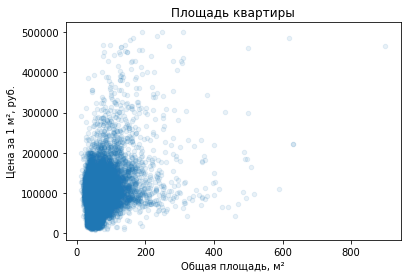

In [578]:
print('Коэффициент корреляции цены и общей площади -', df['price_square_meter'].corr(df['total_area']))

# график цены за кв метр price_square_meter от общей площади total_area
df.plot(title='Площадь квартиры', x='total_area', y='price_square_meter', kind='scatter', alpha=0.1)
plt.xlabel('Общая площадь, м²')
plt.ylabel('Цена за 1 м², руб.')
plt.show()

**Вывод**

Цена за квадратный метр не слабо зависит от площади квартиры. Скорее она держится в некотором небольшом диапазоне и скорее зависит от других факторов.

Коэффициент корреляции цены и количества комнат - 0.03306198489902438


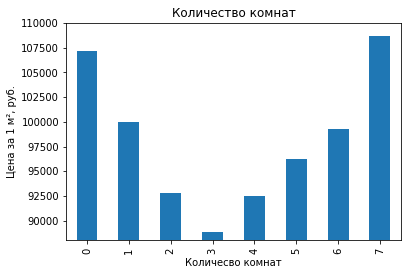

In [579]:
# сводная таблица цены price_square_meter по кол-ву комнат rooms со столбцами count и median
df_square = df.pivot_table('price_square_meter','rooms', aggfunc=['count', 'median'])\
              .set_axis(['count', 'median'], axis=1, inplace=False).reset_index() 

print('Коэффициент корреляции цены и количества комнат -', df['price_square_meter'].corr(df['rooms']))

# график для выборок больше 50
df_square.query('count > 50').plot(title='Количество комнат', kind='bar', y='median', legend=False) # график для выборок больше 50
plt.xlabel('Количесво комнат')
plt.ylabel('Цена за 1 м², руб.')
plt.ylim(88000, 110000)
plt.show()                                                                             

**Вывод**

Количество комнат совсем не увеличивает цену за квадратный метр. Цена снижается от студии к трехкомнатной квартире. Дальнейший рост многокомнатных квартир скорее обуславливается элитностью больших площадей и сторонними факторами. Кроме того, таких квартир много меньше, чтобы давать реальную оценку.

Коэффициент корреляции цены и удаленности - -0.3706066704165855


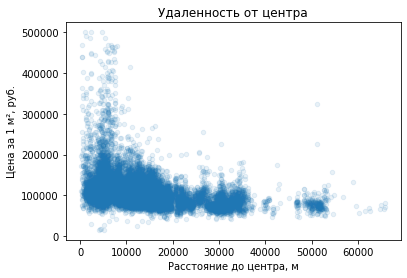

In [580]:
print('Коэффициент корреляции цены и удаленности -', df['price_square_meter'].corr(df['city_centers_nearest']))

# строим график цены за кв метр price_square_meter от удаленности от центра city_centers_nearest
df.plot(title='Удаленность от центра', x='city_centers_nearest', y='price_square_meter', kind='scatter', alpha=0.1)
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена за 1 м², руб.')
plt.show() 

**Вывод**

Чем ниже удаленность от центра, тем выше цена за квадратный метр - эта связь выражена сильнее других, но все же является достаточно слабой.
Цена за квадратный метр выше в радиусе до 10 км от центра. Дальнейшая удаленность от центра еще меньше влияет на стоимость.

Коэффициент корреляции цены и этажа - 0.16144283496512718


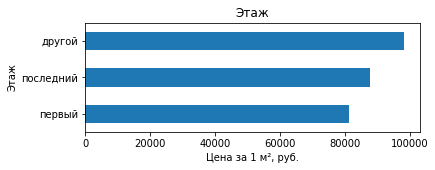

In [581]:
# сводная таблица стоимости квадратного метра price_square_meter по основным этажам floor_group
df_floor = df.pivot_table('price_square_meter', 'floor_group', aggfunc=['count','median'])\
             .set_axis(['count', 'median'], axis=1, inplace=False)\
             .sort_values(by='median').reset_index()

print('Коэффициент корреляции цены и этажа -', df['price_square_meter'].corr(df['floor']))

# график цены квадратного метра в зависимости от этажа
df_floor.plot(title='Этаж', kind='barh', x='floor_group', y='median', figsize=(6,2), legend=False)
plt.ylabel('Этаж')
plt.xlabel('Цена за 1 м², руб.')
plt.show()

**Вывод**

Цена квартиры на первом этаже несколько ниже квартиры на последнем. И заметно ниже квартиры на любом другом этаже.

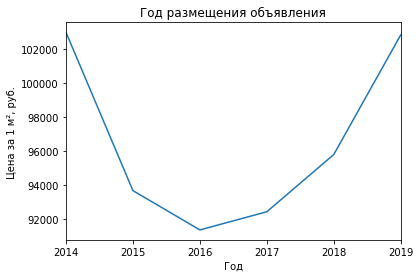

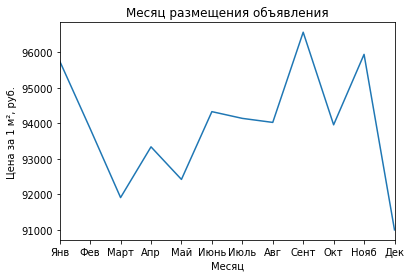

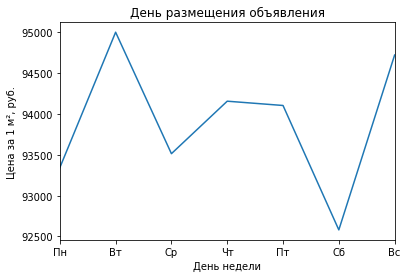

In [582]:
# сводная таблица цены price_square_meter от даты подачи объявления year, month, day
df_date = df.pivot_table('price_square_meter', ['year', 'month','day'],aggfunc=['median'])\
            .set_axis(['median'], axis=1, inplace=False).reset_index() 

df_date.groupby('year')['median'].median().plot(title='Год размещения объявления')    # график цены от года размещения
plt.xlabel('Год')
plt.ylabel('Цена за 1 м², руб.')
plt.show()

df_date.groupby('month')['median'].median().plot(title='Месяц размещения объявления') # график цены от мемяца размещения
plt.xlabel('Месяц')
plt.ylabel('Цена за 1 м², руб.')
plt.xticks(np.arange(1,12.5,1))
plt.gca().set_xticklabels(['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Нояб', 'Дек'])
plt.show()

df_date.groupby('day')['median'].median().plot(title='День размещения объявления')    # график цены от дня размещения
plt.xlabel('День недели')
plt.ylabel('Цена за 1 м², руб.')
plt.gca().set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

**Выводы**
1. В 2015-2016 годах стомость недвижимости был на спаде. Начиная с 2016г. стал расти и в 2019 году достиг уровня цен 2014 года. 2. Стоимость квартир выше с августа по ноябрь ("высокий сезон"). А также в январе (возможно, влияет наступление Нового Года). Дешевле всего квартиры весной ("низкий сезон").
3. Самые дорогие объявления подаются в Пн и Пт. А самая низкая цена у субботних предложений! Это интересно, но врядли является существенным.

### Топ-10 населенных пунктов 
Найдем населенные пункты с самым большим количеством объявлений о продаже недвижимости. Посчитаем для этих 10 населенных пунктов среднуюю цену за квадратный метр.

In [583]:
# найдем топ-10 населенных пунктов locality_name по количеству объявлений
top_10 = df['locality_name'].value_counts().nlargest(10) 

# для топ-10 населенных пунктов locality_name считаем медианную стоимость кв метра price_square_meter
df.query('locality_name in @top_10.index')\
.groupby('locality_name')['price_square_meter']\
.median().sort_values(ascending=False)

locality_name
Санкт-Петербург     104,700.00
Пушкин              100,000.00
деревня Кудрово      91,860.00
посёлок Парголово    91,642.00
посёлок Мурино       85,878.00
посёлок Шушары       76,829.00
Колпино              74,723.50
Гатчина              67,796.00
Всеволожск           65,789.00
Выборг               58,307.00
Name: price_square_meter, dtype: float64

**Выводы**
1. Больше всего объявлений в Санкт-Петербурге (что понятно) и в ближайших к нему населенных пунктах.
2. В ТОП-10 также вошел и г. Выборг, расположен далеко от Санкт-Петербурга, но достаточно крупный город ЛО.
2. Цена в Выборге (замыкает ТОП-10) за квадрат почти в половину меньше по сравнению с Санкт-Петербургом.

### Определяем центр Санкт-Петербурга
Для определения границ центральной зоны города, необходимо рассчитать среднюю цену для каждого километра и построить график завистмости этой цены от удаленности.

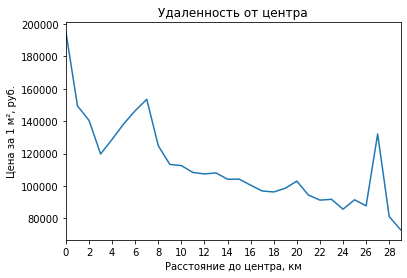

In [584]:
# таблица df_spb по Санкт_Петербургу, округляем city_centers_nearest до целых
df_spb = df.query('locality_name in "Санкт-Петербург"').reset_index(drop=True).round({'city_centers_nearest':0})      
# округляем city_centers_nearest до целых                                 
df_spb['city_centers_nearest_km'] = round(df_spb['city_centers_nearest'] / 1000, 0)
# график цены стоимости last_price от удаленности от центра city_centers_nearest
df_spb.pivot_table('price_square_meter', 'city_centers_nearest_km',  aggfunc='mean')\
      .plot(title='Удаленность от центра', legend=False)
plt.xlabel('Расстояние до центра, км')
plt.ylabel('Цена за 1 м², руб.')
plt.xticks(ticks=np.arange(0, 30, 2))
plt.show()

**Вывод**

По графику центральная зона в пределах 8км от центра города Санкт-Петербурга. В самом центре Петербурга цена растет в разы.

### Оценка сегмента квартир в центре Санкт-Петербурга
Теперь посмотрим на конкретный сегмент квартир - центральная часть Санкт-Петербурга.

Для наглядности сравним следующие параметры квартир центра Петербурга и всех населенных пунктов:
- площадь `total_area`;
- цена `price_square_meter`;
- чилсло комнат `rooms`;
- высота потолков `ceiling_height`.

После этого сравним влияние на цену за квадратный метр `price_square_meter`, числа комнат `rooms`, этажа `floor_group`, удаленности от центра `city_centers_nearest` и даты размещения `year`, `month`, `day` для центральной части Санкт-Петербурга и всех населенных пунктов в целом.

Для центральной части определим срез данных, с удаленностью не более 8км.

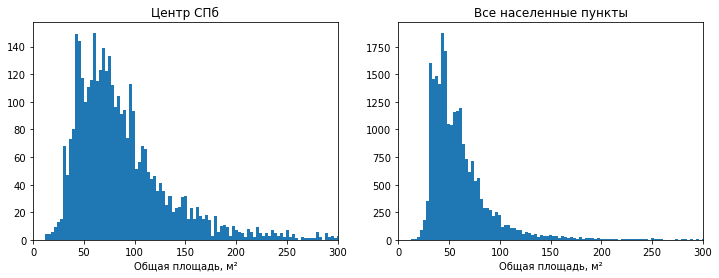

In [585]:
# таблица данных для центра СПб df_spb_center, удаленность от центра не более 8000м
df_spb_center = df_spb.query('city_centers_nearest <= 8000').reset_index(drop=True)

# гистораммы общей площади total_area
f, axs = plt.subplots(2,2,figsize=(12,4))                      
plt.subplot(1, 2, 1)
plt.hist(df_spb_center['total_area'], bins=300) # гистограмма total_area для СПб
plt.title('Центр СПб')
plt.xlabel('Общая площадь, м²')
plt.xlim(0,300)

plt.subplot(1, 2, 2)                                           
plt.hist(df['total_area'], bins=300)            # гистограмма total_area для всех населенных пунктов
plt.title('Все населенные пункты')
plt.xlabel('Общая площадь, м²')
plt.xlim(0,300)

plt.show()

**Вывод**

Основная масса объявлений для центральной части Санкт-Петербурга - от 25м² до 170м². В городе больше кварир с большей площадью, при этом квартир с площадью примерно 45м² наоборот меньше. Для центра Санкт-Петерубрга на ряду с небольшими квартирами 30-50м² чуть более характерны квартиры 60-80м².

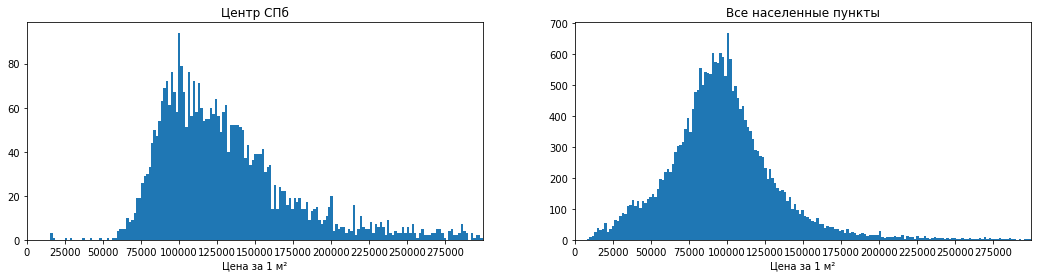

In [586]:
# гистограммы стоимости квадратного метра price_square_meter
f, axs = plt.subplots(2,2,figsize=(18,4))
plt.subplot(1, 2, 1)
plt.hist(df_spb_center['price_square_meter'], bins=300) # гистограмма price_square_meter для СПб
plt.title('Центр СПб')
plt.xlabel('Цена за 1 м²')
plt.xlim(0,300000)
plt.xticks(ticks=np.arange(0,300000, 25000))

plt.subplot(1, 2, 2)
plt.hist(df['price_square_meter'], bins=300)            # гистограмма price_square_meter для всех населенных пунктов
plt.title('Все населенные пункты')         
plt.xlabel('Цена за 1 м²')
plt.xlim(0,300000)
plt.xticks(ticks=np.arange(0,300000, 25000))

plt.show() 

**Вывод**

Средняя цена квадратного метра в центральной части СПб выше других населенных пунктов и составляет 110-125 тысяч. В целом, в Санкт-Петербурге доля квартир с ценой от 100 000 до 200 000 существенно выше. 

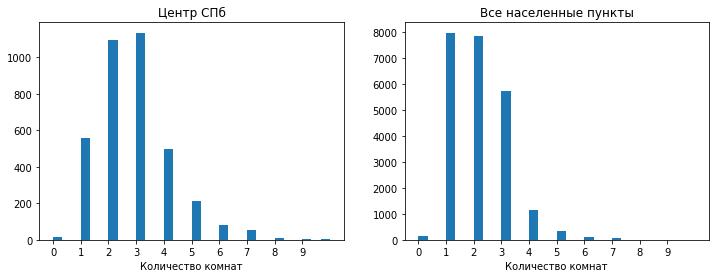

In [587]:
# гистограммы количесва комнат rooms
f, axs = plt.subplots(2,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(df_spb_center['rooms'], bins=30, range=(0,10)) # гистограмма rooms для центра СПб                  
plt.title('Центр СПб')
plt.xlabel('Количество комнат')
plt.xticks(ticks=np.arange(0, 10, 1))

plt.subplot(1, 2, 2)
plt.hist(df['rooms'], bins=30, range=(0,10))            # гистограмма rooms для всех населенных пунктов              
plt.title('Все населенные пункты')
plt.xlabel('Количество комнат')
plt.xticks(ticks=np.arange(0, 10, 1))

plt.show()                                               

**Вывод**

В центре СПБ распространены 2х и 3х комнатные квартиры. По сравнению со всеми населенными пунктами однокомнатных квартир заметно меньше, при этом многокомнатных несколько больше. Это соотносится с распередлением квартир по общей площади.


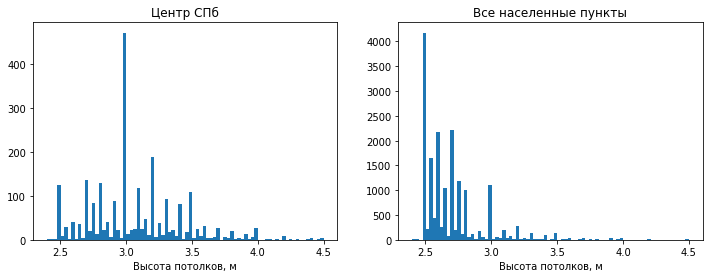

In [588]:
# гистограммы высоты потолков ceiling_height
f, axs = plt.subplots(2,2,figsize=(12,4))
plt.subplot(1, 2, 1)
plt.hist(df_spb_center['ceiling_height'], bins=80, range=(2.4,4.5)) # гистограмма ceiling_height для центра СПб      
plt.title('Центр СПб')
plt.xlabel('Высота потолков, м')

plt.subplot(1, 2, 2)
plt.hist(df['ceiling_height'], bins=80, range=(2.4,4.5))            # гистограмма ceiling_height для всех населенных пунктов
plt.title('Все населенные пункты')
plt.xlabel('Высота потолков, м')

plt.show()                                                

**Вывод**

В центре СПБ ожидаемо выше высота потолков, около 3м. На это, конечно, влияет сама историческая застройка центральной части города.

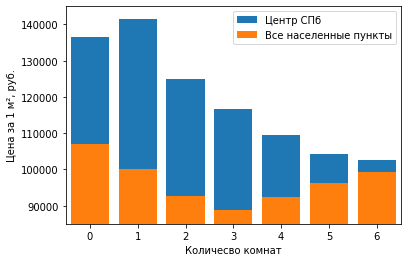

In [589]:
# сводная таблица для данных о цене за кв метр price_square_meter в зависимости от количества комнат rooms
df_spb_center_square = df_spb_center.pivot_table('price_square_meter','rooms', aggfunc=['count', 'median'])\
                                    .set_axis(['count', 'median'], axis=1, inplace=False)\
                                    .reset_index()

# графики зависимости средней цены квадратного метра price_square_meter от количества комнат rooms
# график price_square_meter от rooms для СПб 
plt.bar(df_spb_center_square['rooms'], df_spb_center_square['median'], label='Центр СПб') 
# график price_square_meter от rooms для всех населенных пунктов
plt.bar(df_square['rooms'], df_square['median'], label='Все населенные пункты')                                                
plt.xlabel('Количесво комнат') 
plt.ylabel('Цена за 1 м², руб.')
plt.legend(loc='best')
plt.xlim(-0.5,6.5)
plt.ylim(85000,145000)
plt.show()    

**Вывод**

Цены в Санкт-Петербурге в среднем выше стоимость квадратного метра. Самые дорогие кватриры - однокомнатные, студии дешевле. При этом цена снижается вплоть до 5-6 комнат.

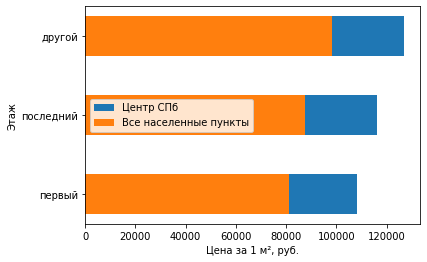

In [590]:
# сводная таблица для данных о цене за кв метр price_square_meter в зависимости от этажа floor_group
df_spb_center_floor = df_spb_center.pivot_table('price_square_meter', 'floor_group', aggfunc=['count','median'])\
                                   .set_axis(['count', 'median'], axis=1, inplace=False)\
                                   .sort_values(by='median').reset_index()

# графики зависимости средней цены квадратного метра price_square_meter от этажа floor_group
# график price_square_meter от floor_group для СПб 
plt.barh(df_spb_center_floor['floor_group'], df_spb_center_floor['median'], height=0.5, label='Центр СПб') 
# график price_square_meter от floor_group для всех населенных пунктов
plt.barh(df_floor['floor_group'], df_floor['median'], height=0.5, label='Все населенные пункты')                       
plt.legend(loc='center left')
plt.xlabel('Цена за 1 м², руб.')
plt.ylabel('Этаж') 
plt.show()    

**Вывод**

Цены на квартиры в центре Санкт-Петербурга выше. Однако, тенденция снижения цены в зависимоти от расположения квартиры на определенном этаже сохраняется. Самая низкая цена у квартир на 1 этаже.

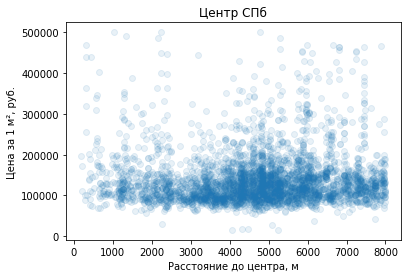

In [591]:
# строим график цены за кв метр price_square_meter от удаленности от центра city_centers_nearest для центра СПБ
plt.scatter(df_spb_center['city_centers_nearest'], df_spb_center['price_square_meter'], alpha=0.1)
plt.title('Центр СПб')                                                                             
plt.xlabel('Расстояние до центра, м')
plt.ylabel('Цена за 1 м², руб.')
plt.show()

**Вывод**

Диапазон в центре Санкт-Петербурга примерно один и тот же. Однако предложений в самом центре (до 3км) меньше, как дорогих так и средних по цене. Данные по удаленности от центра есть только по Санкт-Петербургу, поэтому сравнение с остальными населенными пунктами не имеет смысла.

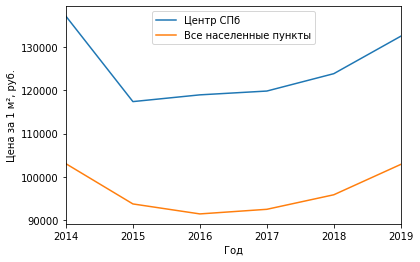

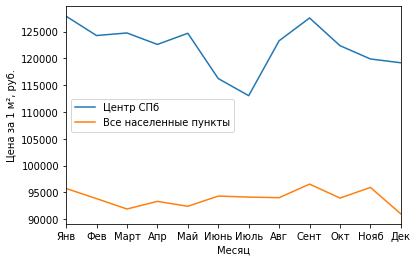

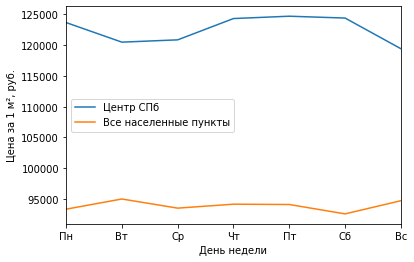

In [592]:
# сводная таблица средней стоимости квадратного метра в зависимости от даты размещения объявления 
df_spb_center_date = df_spb_center.pivot_table('price_square_meter',['year', 'month','day'], aggfunc=['median'])\
                                  .set_axis(['median'], axis=1, inplace=False).reset_index() 

# данные для графиков центра СПб
data_year_spb = df_spb_center_date.groupby('year')['median'].median()
data_month_spb = df_spb_center_date.groupby('month')['median'].median()
data_day_spb = df_spb_center_date.groupby('day')['median'].median()

# данные для графиков для всех населенных пунктов
data_year = df_date.groupby('year')['median'].median()
data_month = df_date.groupby('month')['median'].median()
data_day =df_date.groupby('day')['median'].median()

# графики средней стоимости квадратного метра в зависимости от года подачи объявления
plt.plot(data_year_spb.index, data_year_spb, label='Центр СПб')     # график цены по year для СПб
plt.plot(data_year.index, data_year, label='Все населенные пункты') # график цены по year для всех населенных пунктов
plt.legend(loc='upper center')
plt.xlabel('Год')
plt.ylabel('Цена за 1 м², руб.')
plt.xlim(2014,2019)
plt.show()

# графики средней стоимости квадратного метра в зависимости от месяца подачи объявления
plt.plot(data_month_spb.index, data_month_spb, label='Центр СПб')     # график цены по month для СПб
plt.plot(data_month.index, data_month, label='Все населенные пункты') # график цены по month для всех населенных пунктов
plt.legend(loc='center left')
plt.xlabel('Месяц')
plt.ylabel('Цена за 1 м², руб.')
plt.xticks(np.arange(1,12.5,1))
plt.xlim(1,12)
plt.gca().set_xticklabels(['Янв', 'Фев', 'Март', 'Апр', 'Май', 'Июнь', 'Июль', 'Авг', 'Сент', 'Окт', 'Нояб', 'Дек'])
plt.show()

# графики средней стоимости квадратного метра в зависимости от дня подачи объявления
plt.plot(data_day_spb.index, data_day_spb, label='Центр СПб')     # график цены по day для СПб
plt.plot(data_day.index, data_day, label='Все населенные пункты') # график цены по day для всех населенных пунктов
plt.legend(loc='center left')
plt.xlabel('День недели')
plt.ylabel('Цена за 1 м², руб.')
plt.xlim(0,6)
plt.gca().set_xticklabels(['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс'])
plt.show()

**Выводы**

1. В центральной части Санкт-Петербурга снижение цен с 2014 года и рост с 2017 - так же, как и везде. Однако минимум цен наблюдался не в 2016 году, а в 2015г.
2. В Санкт-Петербурге более ярко выражена сезонность цен на квартиры. Дешевле всего они летом. Пик приходится на Август-Октябрь, а также январь. При этом сильного цен весной не происходит.
3. Самые высокие цены встречаются в объявлениях, размещенных в Чт и Сб, а самые низкие цены - в Вс. Центальная часть Санкт-Петербурга явно живет в своем ритме.

## Общий вывод

В настоящем исследовании были проанализированы данные о продаже недвижимости Санкт-Петербурга и ЛО. Сравнение главным образом происходило центральной части Санкт-Петербурга и региона в целом. Можно выделить следующие моменты:

1. Средняя стоимость квадратного метра в центре Санкт-Петербурга - 110-125 тысяч, в регионе в целом на 15% ниже - 90-105 тысяч. Основная масса объявлений приходится на Санкт-Петерубург и  крупные близлежащие населенные пункты.


2. Сами квартиры центральной части Санкт-Петербурга большей площади, с более высокими потолками. 


3. В регионе самые низкие цены на трехкомнатные квартиры, в центре Санкт-Петербурга - многокомнатные квартиры. На первом этаже дешевле.


4. Для всех населенных пунктов, в том числе и центра Санкт-Петербурга, высокая цена у однокомнатных квартир.


5. С 2014 года на рынке недвижимости был спад цен. К 2019 году он вернулся на прежний уровень. 


6. На стоимость влияет также сезон размещения объявления. В августе-октябре и январе цены растут. Летом цены снижены.


7. Основная масса квартир продается за 3 месяца.